In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA

In [4]:
dfb_data = pd.read_csv("daily-total-female-births-CA.csv")
dfb_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
dfb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
birth_data=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [7]:
birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
birth_data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

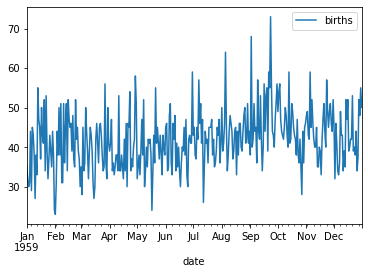

In [9]:
birth_data.plot() #almost a stationary series

In [10]:
# also called as smoothing
moving_average_birth=birth_data.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [11]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


<AxesSubplot:xlabel='date'>

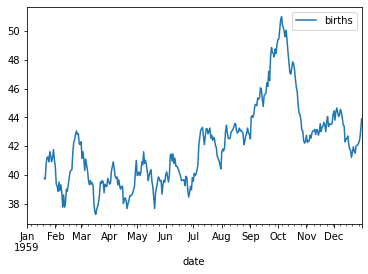

In [12]:
moving_average_birth.plot() # we can see that there is a peak in the month of october

In [13]:
sm.stats.durbin_watson(birth_data) # very less correlation

array([0.04624491])

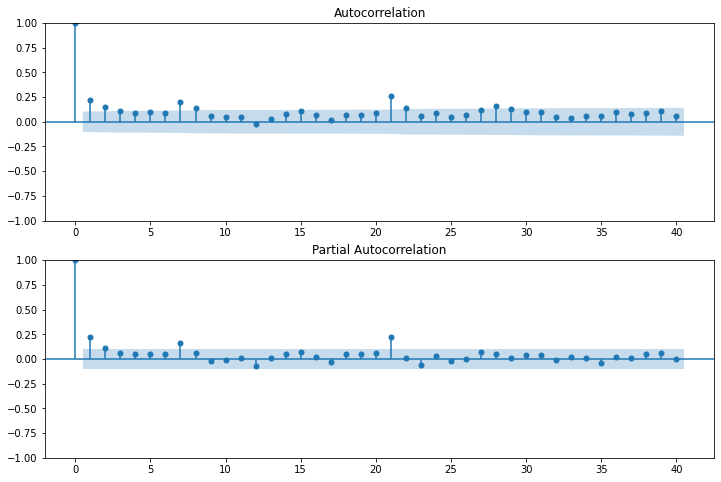

In [14]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=40, ax=ax2)

In [15]:
training_data=birth_data[0:320]
test_data=birth_data[320:]

In [16]:
from sklearn.model_selection import train_test_split

t_x, t = train_test_split(birth_data, test_size=0.2, random_state=42)

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming training_data is your time series data
arima = ARIMA(training_data, order=(2, 1, 3))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
model = arima.fit()

In [21]:
model.aic

2167.8472399068664

In [22]:
pred= model.forecast(steps=45)[0]

In [23]:
pred

42.860639345646966

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming Pred is your predictions and test_data is your actual test data
test_data = np.array([1, 2, 3, 4, 5])  # Example actual test data
Pred = np.array([1.2, 2.3, 2.9, 4.1, 5.2])  # Example predictions

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, Pred))
print("RMSE:", rmse)

RMSE: 0.19493588689617922
